# build dataset

In [1]:
import seismic_dataset_builder  
(X_train, y_train, v_train), (X_test, y_test, v_test), values, labels = seismic_dataset_builder.create_bp_synth()

# build and train calssification CNN

In [3]:
import seismic_ml_kernel
classification_model = seismic_ml_kernel.ci_multi_train_classification (X_train, y_train, 30)

image has 4600 pixels


C:\Users\kostyad\Documents\Jupyter\seismic_fingerprint\seismic_ml_kernel.py:150: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("fl..., inputs=Tensor("in...)`
  vision_model = Model(input=inp, output=flat) # To define a model, just specify its input and output layers


image has 2300 pixels
image has 2350 pixels
number of vision models 3
Vision models are ready
Classification model is ready
Classification model compiled
Train on 12364 samples, validate on 1374 samples
Epoch 1/30
12364/12364 [==============================] - 897s - loss: 1.2151 - acc: 0.4254 - val_loss: 0.4937 - val_acc: 0.8654
Epoch 2/30
12364/12364 [==============================] - 878s - loss: 0.6099 - acc: 0.7777 - val_loss: 0.2948 - val_acc: 0.9258
Epoch 3/30
12364/12364 [==============================] - 900s - loss: 0.4940 - acc: 0.8238 - val_loss: 0.1928 - val_acc: 0.9461
Epoch 4/30
12364/12364 [==============================] - 861s - loss: 0.4338 - acc: 0.8434 - val_loss: 0.1979 - val_acc: 0.9534
Epoch 5/30
12364/12364 [==============================] - 866s - loss: 0.3983 - acc: 0.8564 - val_loss: 0.1861 - val_acc: 0.9483
Epoch 6/30
12364/12364 [==============================] - 870s - loss: 0.3606 - acc: 0.8706 - val_loss: 0.1423 - val_acc: 0.9512
Epoch 7/30
12364/12364 

# test classification dataset

In [4]:
seismic_ml_kernel.ci_multi_test_classification (classification_model, X_test, y_test)

3422/3422 [==============================] - 71s    
[0.18225413647086769, 0.93687901815289576]


# classification on single image

sample: 1671
sample label: BP 0.4, 0.45, 0.5, 0.55
predicted label: BP 0.4, 0.45, 0.5, 0.55
sample category: 3
predicted category: 3
prediction accuracy: 98.3986616135 %


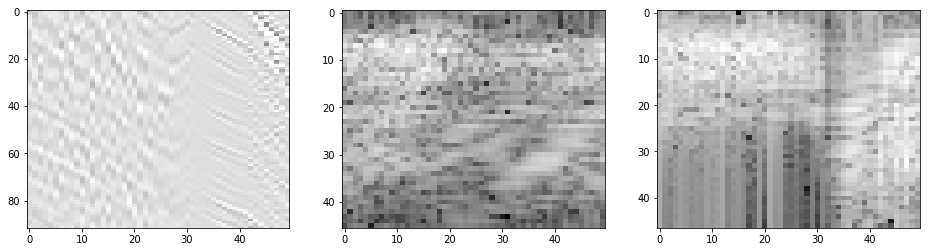

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
    
randidx, predicted_y = seismic_ml_kernel.ci_multi_evaluate_random_classification (classification_model, X_test)

correct_y = y_test[randidx]
color = 'green'
predicted_cat = predicted_y.argmax() 
if predicted_cat != correct_y:
    color = 'red'

import pandas as pd
table = pd.DataFrame(predicted_y*100).style.apply(seismic_ml_kernel.highlight_max, color=color, axis=None)


print('sample:', randidx)
print('sample label:', labels[y_test[randidx]])
print('predicted label:', labels[predicted_cat])
print('sample category:', y_test[randidx])
print('predicted category:', predicted_cat)
print('prediction accuracy:', predicted_y[predicted_cat]*100, '%')
table

# vision model 1
![title](outputs/classification_vision_model0.png)

# vision model 2
![title](outputs/classification_vision_model1.png)

# vision model 3
![title](outputs/classification_vision_model2.png)

# classification model
![title](outputs/classification_model.png)